In [14]:
import pandas as pa
import matplotlib.pyplot as plt

In [15]:
df = pa.read_csv('dataset/SuperMarket Analysis.csv', encoding='utf-8', sep=',')
print(df.head()) # Apresenta as primeiras linhas do DataFrame


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

In [16]:
# Traduzindo valores, pensando que o público é brasileiro

df['Gender'] = df['Gender'].replace('Female', 'Feminino')
df['Gender'] = df['Gender'].replace('Male', 'Masculino')

df['Payment'] = df['Payment'].replace('Cash', 'Espécie')
df['Payment'] = df['Payment'].replace('Credit card', 'Cartão de crédito')
df['Payment'] = df['Payment'].replace('Ewallet', 'Carteira digital')

In [17]:
print(df.isnull().sum()) # Conta o número de valores ausentes em cada coluna

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


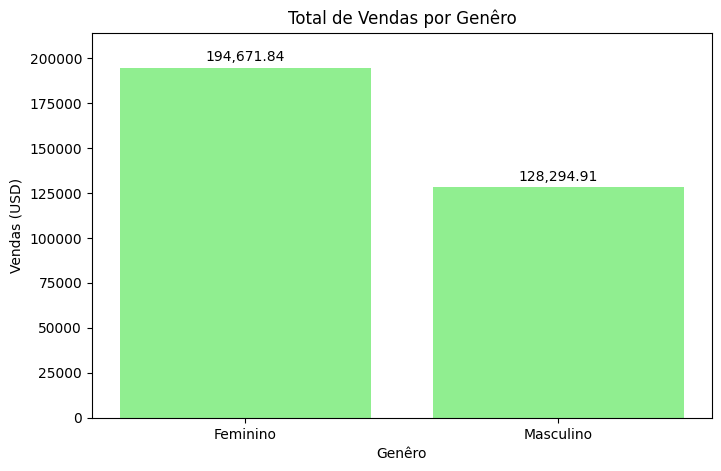

In [18]:
# Análise de vendas por genêro

vendas_genero = df.groupby("Gender")["Sales"].sum()

plt.figure(figsize=(8,5))
barras = plt.bar(vendas_genero.index, vendas_genero.values, color="lightgreen")

plt.title("Total de Vendas por Genêro")
plt.xlabel("Genêro")
plt.ylabel("Vendas (USD)")

plt.ylim(0, max(vendas_genero.values)*1.1)

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura + 0.01*max(vendas_genero.values),
        f"{altura:,.2f}",
        ha="center", va="bottom"
    )

plt.show()


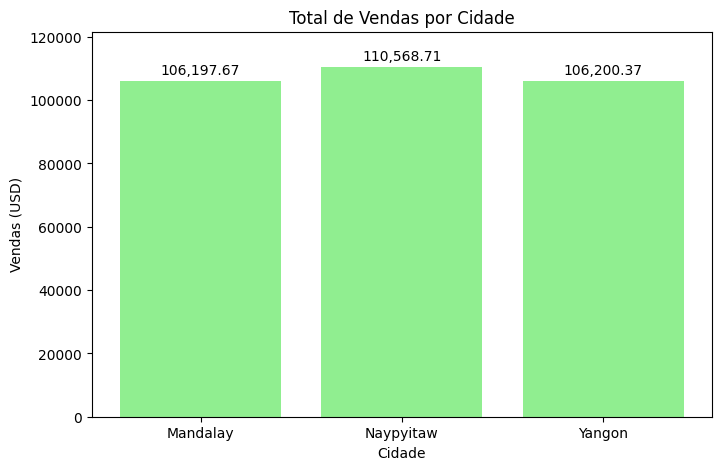

In [19]:
# Análise de vendas por cidade

vendas_cidade = df.groupby("City")["Sales"].sum()

plt.figure(figsize=(8,5))
barras = plt.bar(vendas_cidade.index, vendas_cidade.values, color="lightgreen")

plt.title("Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Vendas (USD)")

plt.ylim(0, max(vendas_cidade.values)*1.1)

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura + 0.01*max(vendas_cidade.values),
        f"{altura:,.2f}",
        ha="center", va="bottom"
    )

plt.show()


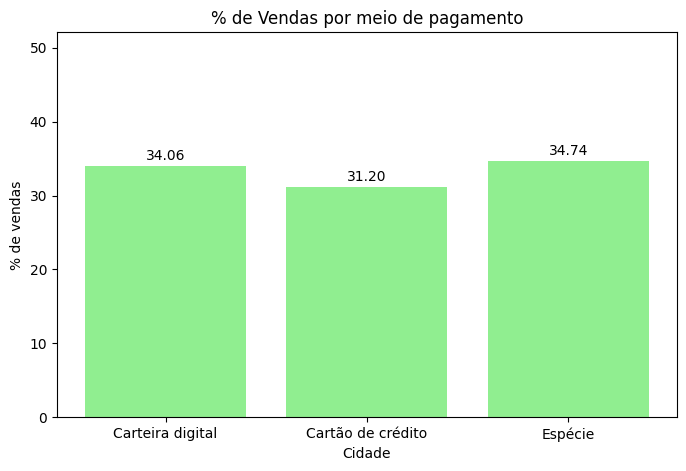

In [20]:
# Análise de vendas por método de pagamento

vendas_payment = df.groupby("Payment")["Sales"].sum()
percentual_payment = vendas_payment / vendas_payment.sum() * 100

plt.figure(figsize=(8,5))
barras = plt.bar(percentual_payment.index, percentual_payment.values, color="lightgreen")

plt.title("% de Vendas por meio de pagamento")
plt.xlabel("Cidade")
plt.ylabel("% de vendas")

plt.ylim(0, max(percentual_payment.values)*1.5)

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura + 0.01*max(percentual_payment.values),
        f"{altura:,.2f}",
        ha="center", va="bottom"
    )

plt.show()


In [21]:
# Verifica ticket médio por cidade

ticket_medio = df.groupby("City")["Sales"].mean().sort_values(ascending=False)
print(ticket_medio)

City
Naypyitaw    337.099715
Mandalay     319.872506
Yangon       312.354031
Name: Sales, dtype: float64


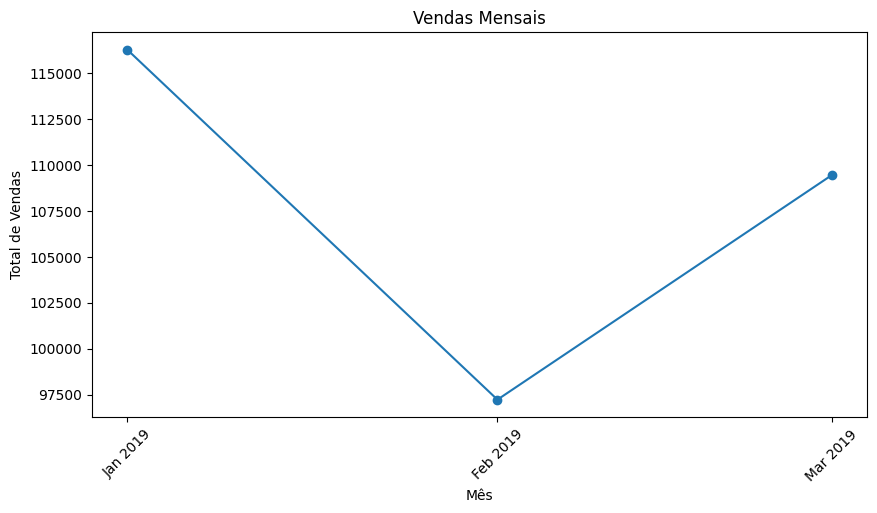

In [22]:
# Converter para datetime (se ainda não estiver)
df['Date'] = pa.to_datetime(df['Date'])

# Agrupar por mês
vendas_mensal = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()

# Converter para datetime (primeiro dia do mês)
vendas_mensal.index = vendas_mensal.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(vendas_mensal.index, vendas_mensal.values, marker='o')
plt.title("Vendas Mensais")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")

# Formatar eixo x para mostrar apenas Mês/Ano
plt.xticks(vendas_mensal.index, [x.strftime('%b %Y') for x in vendas_mensal.index], rotation=45)

plt.show()